In [21]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib

# Package to implement ML Algorithms
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report

# Import packages to implement Stratified K-fold CV
from sklearn.model_selection import KFold # For creating folds

# Import Package to implement GridSearch CV
from sklearn.model_selection import GridSearchCV

# Importing package for Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV

# Package to record time
import time

# Package for Data pretty printer
from pprint import pprint

# Module to save and load Python objects to and from files
import pickle 

# Ignore Deprecation Warnings
import warnings
warnings.filterwarnings('ignore')

# Package for XGBoost
from xgboost import XGBRegressor

# Package to get MSE
from sklearn.metrics import mean_squared_error

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']

%matplotlib inline

In [3]:
# Import Data
traffic_df = pd.read_csv('Traffic_Volume.csv')
traffic_df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
# Extract the month, day of the week, and time of day from the 'date_time' column
traffic_df['month'] = pd.to_datetime(traffic_df['date_time']).dt.month
traffic_df['day_of_week'] = pd.to_datetime(traffic_df['date_time']).dt.weekday
traffic_df['time_of_day'] = pd.to_datetime(traffic_df['date_time']).dt.strftime('%H')

In [5]:
traffic_df['traffic_volume'].value_counts(normalize=True)
X = traffic_df.drop(columns = ['traffic_volume','weather_description','date_time'])
y = traffic_df['traffic_volume']

cat_var = ['holiday', 'weather_main','month','day_of_week','time_of_day']
X_encoded = pd.get_dummies(X, columns = cat_var)

train_X, test_X, train_y, test_y = train_test_split(X_encoded, y, test_size = 0.2, random_state = 1)

In [6]:
# Creating folds
folds = KFold(n_splits = 5, shuffle = True, random_state = 3)


DecisionTreeRegressor

In [7]:
bestClassTree = DecisionTreeRegressor(max_depth=22, min_samples_leaf=20, min_samples_split=18,random_state=2)

In [9]:
start = time.time()            # Start Time
bestClassTree.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Training time: 0.26467275619506836s


In [22]:
# predictions on test set
y_pred = bestClassTree.predict(test_X)

score = bestClassTree.score(train_X, train_y)
print('R-squared:', score)
rmse = (mean_squared_error(test_y, y_pred))**(1/2)
print('RMSE: ', rmse)

R-squared: 0.9417378344825197
RMSE:  488.7905537766082


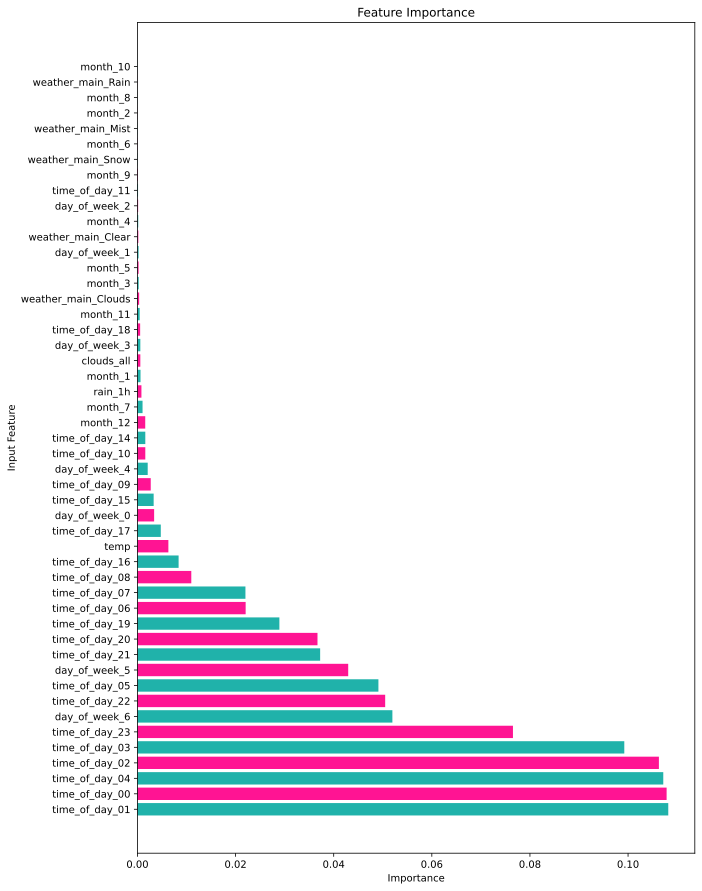

In [26]:
# Storing importance values from the best fit model
importance = bestClassTree.feature_importances_

# Displaying feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Selecting features with non-zero importance values
feature_imp_nonzero = feature_imp[feature_imp['Importance'] != 0.0]

# Bar plot
plt.figure(figsize=(10, 15), dpi = 100)
plt.barh(feature_imp_nonzero['Feature'], feature_imp_nonzero['Importance'], color = ['lightseagreen', 'deeppink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title("Feature Importance");
plt.savefig('dt_traffic_importance.svg')

RandomForestRegressor

In [11]:
bestForest = RandomForestRegressor(max_depth=21, min_samples_leaf=4, min_samples_split=8,
                      n_estimators=150, random_state=2)

In [12]:
start = time.time()            # Start Time
bestForest.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Training time: 39.42057132720947s


In [23]:
# predictions on test set
y_pred2 = bestForest.predict(test_X)

score2 = bestForest.score(train_X, train_y)
print('R-squared:', score2)
rmse2 = (mean_squared_error(test_y, y_pred2))**(1/2)
print('RMSE: ', rmse2)

R-squared: 0.949814338235056
RMSE:  475.4002642492531


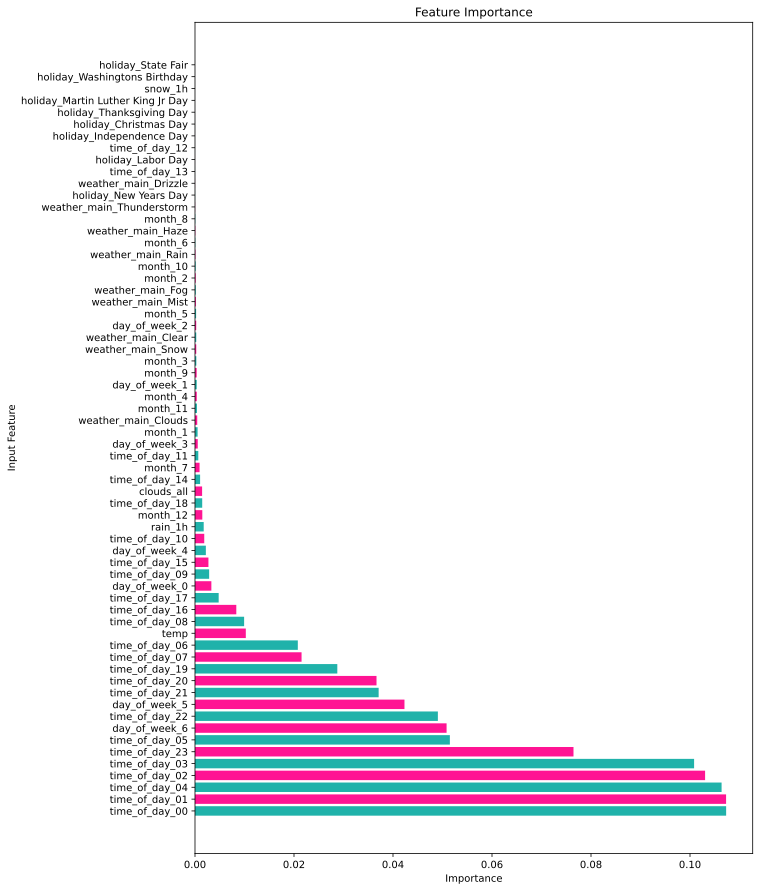

In [27]:
# Storing importance values from the best fit model
importance2 = bestForest.feature_importances_

# Displaying feature importance as a dataframe
feature_imp2 = pd.DataFrame(list(zip(train_X.columns, importance2)),
               columns = ['Feature', 'Importance'])

feature_imp2 = feature_imp2.sort_values('Importance', ascending = False).reset_index(drop = True)

# Selecting features with non-zero importance values
feature_imp_nonzero2 = feature_imp2[feature_imp2['Importance'] != 0.0]

# Bar plot
plt.figure(figsize=(10, 15), dpi = 100)
plt.barh(feature_imp_nonzero2['Feature'], feature_imp_nonzero2['Importance'], color = ['lightseagreen', 'deeppink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title("Feature Importance");
plt.savefig('rf_traffic_importance.svg')

AdaBoostRegressor

In [14]:
bestAda=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=9),
                  learning_rate=0.02, n_estimators=500, random_state=2)

In [15]:
start = time.time()            # Start Time
bestAda.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Training time: 132.66908645629883s


In [24]:
# predictions on test set
y_pred3 = bestAda.predict(test_X)

score3 = bestAda.score(train_X, train_y)
print('R-squared:', score3)
rmse3 = (mean_squared_error(test_y, y_pred3))**(1/2)
print('RMSE: ', rmse3)

R-squared: 0.8142486179669973
RMSE:  867.6209804812071


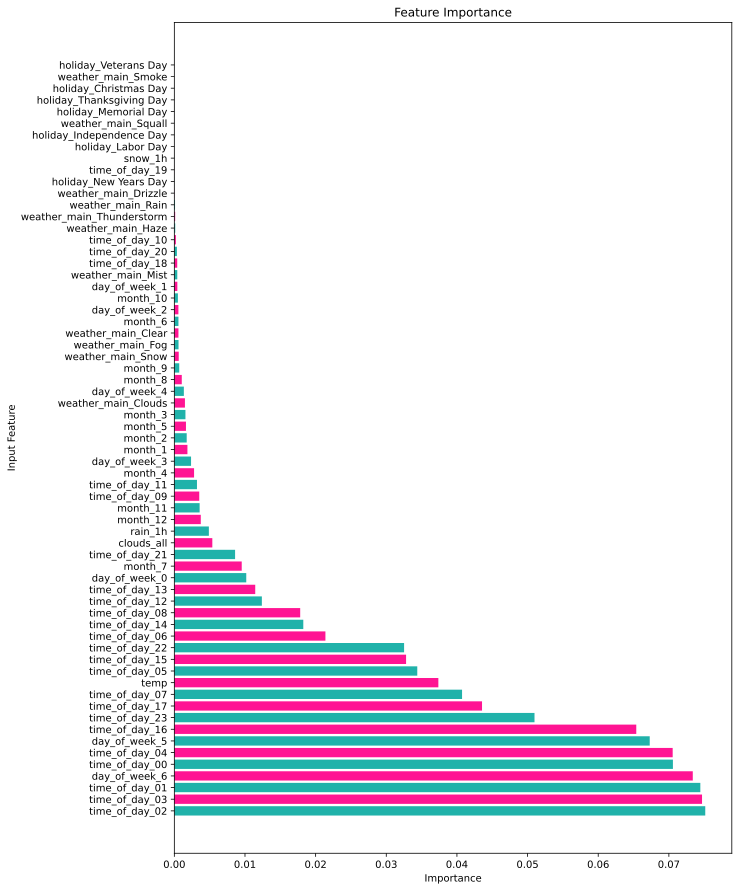

In [28]:
# Storing importance values from the best fit model
importance3 = bestAda.feature_importances_

# Displaying feature importance as a dataframe
feature_imp3 = pd.DataFrame(list(zip(train_X.columns, importance3)),
               columns = ['Feature', 'Importance'])

feature_imp3 = feature_imp3.sort_values('Importance', ascending = False).reset_index(drop = True)

# Selecting features with non-zero importance values
feature_imp_nonzero3 = feature_imp3[feature_imp3['Importance'] != 0.0]

# Bar plot
plt.figure(figsize=(10, 15), dpi = 100)
plt.barh(feature_imp_nonzero3['Feature'], feature_imp_nonzero3['Importance'], color = ['lightseagreen', 'deeppink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title("Feature Importance");
plt.savefig('ada_traffic_importance.svg')

XGBoostRegressor

In [17]:
bestXGB = XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.11, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, monotone_constraints=None,
             multi_strategy=None, n_estimators=170, n_jobs=None,
             num_parallel_tree=None, random_state=2)

In [18]:
start = time.time()            # Start Time
bestXGB.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Training time: 5.852503299713135s


In [25]:
# predictions on test set
y_pred4 = bestXGB.predict(test_X)

score4 = bestXGB.score(train_X, train_y)
print('R-squared:', score4)
rmse4 = (mean_squared_error(test_y, y_pred4))**(1/2)
print('RMSE: ', rmse4)

R-squared: 0.9749801536760445
RMSE:  429.94351387352725


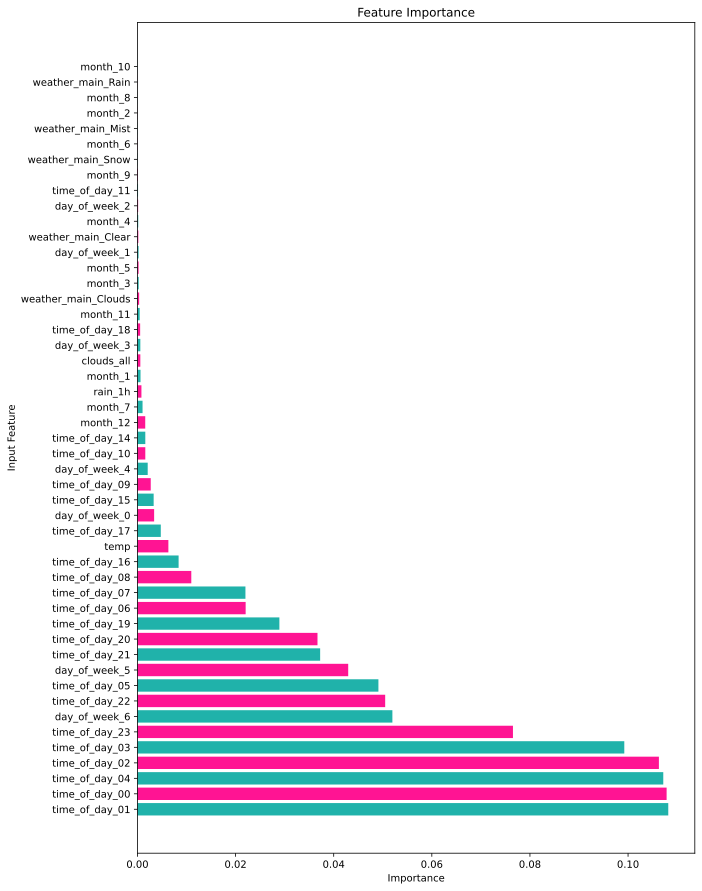

In [29]:
# Storing importance values from the best fit model
importance4 = bestXGB.feature_importances_

# Displaying feature importance as a dataframe
feature_imp4 = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp4 = feature_imp4.sort_values('Importance', ascending = False).reset_index(drop = True)

# Selecting features with non-zero importance values
feature_imp_nonzero4 = feature_imp4[feature_imp4['Importance'] != 0.0]

# Bar plot
plt.figure(figsize=(10, 15), dpi = 100)
plt.barh(feature_imp_nonzero4['Feature'], feature_imp_nonzero4['Importance'], color = ['lightseagreen', 'deeppink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title("Feature Importance");
plt.savefig('xgb_traffic_importance.svg')

In [20]:
# Creating the file where we want to write the model
dt_pickle = open('decision_tree_traffic.pickle', 'wb') 
rf_pickle = open('rf_traffic.pickle','wb')
ada_pickle = open('ada_traffic.pickle','wb')
xgb_pickle = open('xgb_traffic.pickle','wb')

# Write DT model to the file
pickle.dump(bestClassTree, dt_pickle) 
pickle.dump(bestForest,rf_pickle)
pickle.dump(bestAda,ada_pickle)
pickle.dump(bestXGB,xgb_pickle)

# Close the file
dt_pickle.close() 
rf_pickle.close()
ada_pickle.close()
xgb_pickle.close()